In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import os


In [16]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_c = pd.read_csv("/content/sample_data/california_housing_train.csv")
df = pd.read_csv("/content/gdrive/MyDrive/Pythin_in_DS/data_cleaning/titanic_train.csv")

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
categorical = df.dtypes[df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
df[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Now time for a bit of data pre-processing. Do we need all the columns? Do any of them contain data that we might not need at all?

In [ ]:
del df["PassengerId"]
del df["Ticket"]


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Are tere any NA values or outliers or strange values

## Age below has count less than the total number of the rows of the dataset. SO there must be some missing values there. Lets find out

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
missing_age = np.array(np.where(df['Age'].isnull()==True))
print(missing_age)

[[  5  17  19  26  28  29  31  32  36  42  45  46  47  48  55  64  65  76
   77  82  87  95 101 107 109 121 126 128 140 154 158 159 166 168 176 180
  181 185 186 196 198 201 214 223 229 235 240 241 250 256 260 264 270 274
  277 284 295 298 300 301 303 304 306 324 330 334 335 347 351 354 358 359
  364 367 368 375 384 388 409 410 411 413 415 420 425 428 431 444 451 454
  457 459 464 466 468 470 475 481 485 490 495 497 502 507 511 517 522 524
  527 531 533 538 547 552 557 560 563 564 568 573 578 584 589 593 596 598
  601 602 611 612 613 629 633 639 643 648 650 653 656 667 669 674 680 692
  697 709 711 718 727 732 738 739 740 760 766 768 773 776 778 783 790 792
  793 815 825 826 828 832 837 839 846 849 859 863 868 878 888]]


In [ ]:
df['Age'][missing_age[0,:]]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc147fffd0>]],
      dtype=object)

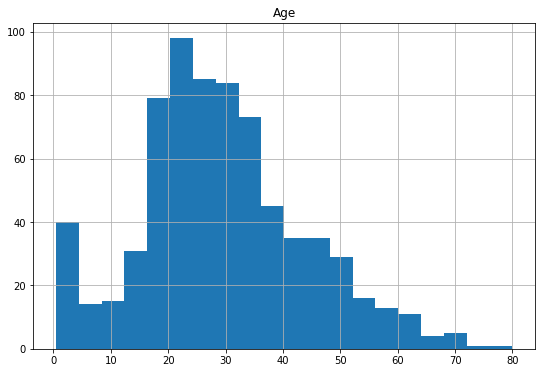

In [ ]:
df.hist(column='Age',
        figsize = (9,6),
        bins = 20)

## So a majority of people are in the age 20-30...lets assign that to missing values

In [ ]:
new_age_var = np.where(df["Age"].isnull(),24,df["Age"])
df["Age"] = new_age_var

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Lets take a look at the histogram again

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc147224d0>]],
      dtype=object)

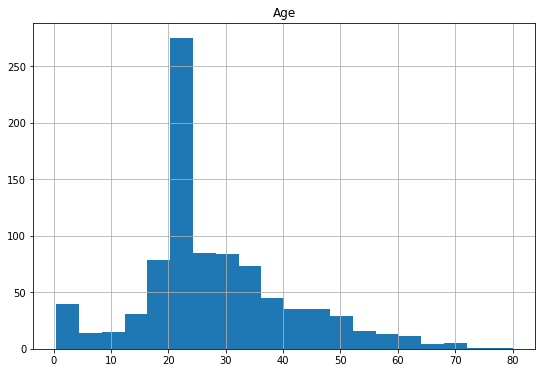

In [ ]:
df.hist(column='Age',
        figsize = (9,6),
        bins = 20)

##Outliers

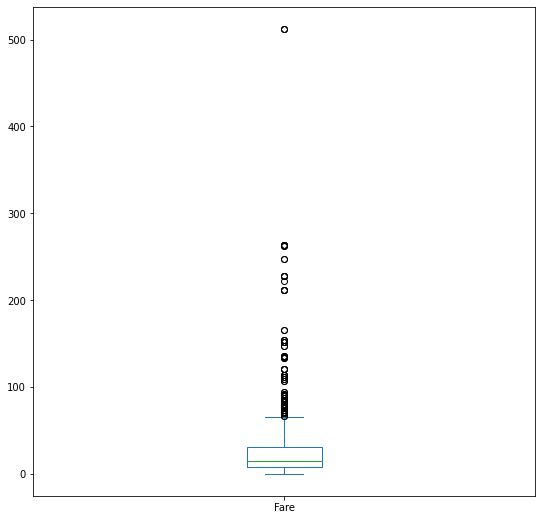

In [ ]:
df["Fare"].plot(kind = "box",figsize = (9,9))

In [ ]:
index = np.where(df["Fare"] == max(df["Fare"]))
df.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
data = [11,12,13,11,12,45,66,7,11,23,24,45,11,56,34,22,33,8,77,33,44,55,66,33,11,33,590,599,595]

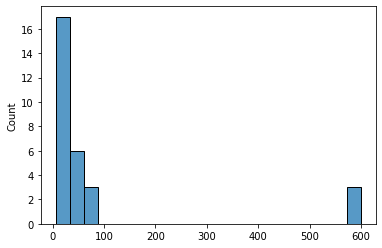

In [ ]:
sns.histplot(data)

In [ ]:
outlier = []
mean1 = np.mean(data)
std1 = np.std(data)
for x in data:
  z=(x-mean1)/std1
  #print(z)
  if np.abs(z)>2.8:
    outlier.append(x)

-0.4510529872912975
-0.44526769908632285
-0.4394824108813482
-0.4510529872912975
-0.44526769908632285
-0.25435318832216025
-0.13286213601769314
-0.474194140111196
-0.4510529872912975
-0.381629528831602
-0.37584424062662736
-0.25435318832216025
-0.4510529872912975
-0.19071501806743937
-0.3179913585768811
-0.3874148170365766
-0.32377664678185575
-0.46840885190622134
-0.06922396576297227
-0.32377664678185575
-0.2601384765271349
-0.196500306272414
-0.13286213601769314
-0.32377664678185575
-0.4510529872912975
-0.32377664678185575
2.89862888338901
2.9506964772337816
2.927555324413883


In [ ]:
outlier

[590, 599, 595]